In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('orders/orders.csv')

In [2]:
product=pd.read_csv('products/products.csv')

In [3]:
final= pd.merge(df, product, on="product_id")
final

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...,...
1384612,3420011,1528,12,0,Sprinkles Decors,97,13
1384613,3420084,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,3420084,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,3420088,16380,12,0,Stevia Sweetener,97,13


In [4]:
orders=final.values.tolist()

In [5]:
transactions={}
for i in range(len(orders)):
    x=orders[i][0]
    if x in transactions:
        transactions[x].append(orders[i][4])
    else:
        transactions[x]=[orders[i][4]]

In [6]:
text=[]
for i in transactions:
    if len(transactions[i])!=1:
        text.append(";".join(transactions[i]))

In [7]:
text = "|".join(text)

In [8]:
def replace(text):
    if ' ' in text: 
        text = text.replace(' ' , '_')
        text = text.replace('-','_')
        text = text.replace(',','_')
    return text
t=replace(text)

In [9]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

In [10]:
import pickle
tokenizer = Tokenizer(filters=';|',lower=True)

tokenizer.fit_on_texts([t])
vocabulary_size = len(tokenizer.word_index) + 1
print('Unique items: %d' % vocabulary_size)
sequences = list()
for line in text.split('|'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    encoded=encoded[:5]
    sequences.append(encoded)
print('Total Sequences: %d' % len(sequences))
pickle.dump(tokenizer, open("token2.pickle", "wb"))

Unique items: 38944
Total Sequences: 124364


In [11]:
tokenizer.word_index

{'banana': 1,
 'bag_of_organic_bananas': 2,
 'organic_strawberries': 3,
 'organic_baby_spinach': 4,
 'large_lemon': 5,
 'organic_avocado': 6,
 'organic_hass_avocado': 7,
 'strawberries': 8,
 'limes': 9,
 'organic_raspberries': 10,
 'organic_blueberries': 11,
 'organic_whole_milk': 12,
 'organic_cucumber': 13,
 'organic_zucchini': 14,
 'organic_yellow_onion': 15,
 'organic_garlic': 16,
 'seedless_red_grapes': 17,
 'asparagus': 18,
 'organic_grape_tomatoes': 19,
 'organic_red_onion': 20,
 'yellow_onions': 21,
 'organic_baby_carrots': 22,
 'honeycrisp_apple': 23,
 'organic_cilantro': 24,
 'organic_lemon': 25,
 'sparkling_water_grapefruit': 26,
 'raspberries': 27,
 'organic_fuji_apple': 28,
 'small_hass_avocado': 29,
 'broccoli_crown': 30,
 'organic_baby_arugula': 31,
 'red_peppers': 32,
 'organic_large_extra_fancy_fuji_apple': 33,
 'original_hummus': 34,
 'organic_blackberries': 35,
 'organic_gala_apples': 36,
 'fresh_cauliflower': 37,
 'michigan_organic_kale': 38,
 'organic_small_bunch_c

In [12]:
keys = tokenizer.word_index.keys()
objects = list(keys)


In [13]:
objects

['banana',
 'bag_of_organic_bananas',
 'organic_strawberries',
 'organic_baby_spinach',
 'large_lemon',
 'organic_avocado',
 'organic_hass_avocado',
 'strawberries',
 'limes',
 'organic_raspberries',
 'organic_blueberries',
 'organic_whole_milk',
 'organic_cucumber',
 'organic_zucchini',
 'organic_yellow_onion',
 'organic_garlic',
 'seedless_red_grapes',
 'asparagus',
 'organic_grape_tomatoes',
 'organic_red_onion',
 'yellow_onions',
 'organic_baby_carrots',
 'honeycrisp_apple',
 'organic_cilantro',
 'organic_lemon',
 'sparkling_water_grapefruit',
 'raspberries',
 'organic_fuji_apple',
 'small_hass_avocado',
 'broccoli_crown',
 'organic_baby_arugula',
 'red_peppers',
 'organic_large_extra_fancy_fuji_apple',
 'original_hummus',
 'organic_blackberries',
 'organic_gala_apples',
 'fresh_cauliflower',
 'michigan_organic_kale',
 'organic_small_bunch_celery',
 'organic_half_&_half',
 'organic_garnet_sweet_potato_(yam)',
 'organic_tomato_cluster',
 'green_bell_pepper',
 'carrots',
 'organic_pe

In [14]:
special_characters = ['!','#','$','%', '&','@','[',']',' ',']','_']
for i in range(len(objects)):
    for j in special_characters:
        objects[i] = objects[i].replace(j,' ')
objects 

['banana',
 'bag of organic bananas',
 'organic strawberries',
 'organic baby spinach',
 'large lemon',
 'organic avocado',
 'organic hass avocado',
 'strawberries',
 'limes',
 'organic raspberries',
 'organic blueberries',
 'organic whole milk',
 'organic cucumber',
 'organic zucchini',
 'organic yellow onion',
 'organic garlic',
 'seedless red grapes',
 'asparagus',
 'organic grape tomatoes',
 'organic red onion',
 'yellow onions',
 'organic baby carrots',
 'honeycrisp apple',
 'organic cilantro',
 'organic lemon',
 'sparkling water grapefruit',
 'raspberries',
 'organic fuji apple',
 'small hass avocado',
 'broccoli crown',
 'organic baby arugula',
 'red peppers',
 'organic large extra fancy fuji apple',
 'original hummus',
 'organic blackberries',
 'organic gala apples',
 'fresh cauliflower',
 'michigan organic kale',
 'organic small bunch celery',
 'organic half   half',
 'organic garnet sweet potato (yam)',
 'organic tomato cluster',
 'green bell pepper',
 'carrots',
 'organic pe

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')
STOPWORDS.append("organic")
for j in range(len(objects)):
    objects[j] = ' '.join([i for i in objects[j].lower().split() if i not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
objects

['banana',
 'bag bananas',
 'strawberries',
 'baby spinach',
 'large lemon',
 'avocado',
 'hass avocado',
 'strawberries',
 'limes',
 'raspberries',
 'blueberries',
 'whole milk',
 'cucumber',
 'zucchini',
 'yellow onion',
 'garlic',
 'seedless red grapes',
 'asparagus',
 'grape tomatoes',
 'red onion',
 'yellow onions',
 'baby carrots',
 'honeycrisp apple',
 'cilantro',
 'lemon',
 'sparkling water grapefruit',
 'raspberries',
 'fuji apple',
 'small hass avocado',
 'broccoli crown',
 'baby arugula',
 'red peppers',
 'large extra fancy fuji apple',
 'original hummus',
 'blackberries',
 'gala apples',
 'fresh cauliflower',
 'michigan kale',
 'small bunch celery',
 'half half',
 'garnet sweet potato (yam)',
 'tomato cluster',
 'green bell pepper',
 'carrots',
 'peeled whole baby carrots',
 'half half',
 'cucumber kirby',
 'italian parsley bunch',
 'red bell pepper',
 'blueberries',
 'granny smith apple',
 'banana',
 '100 whole wheat bread',
 'apple honeycrisp',
 'hass avocados',
 'red vin

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
for j in range(len(objects)):
    words=word_tokenize(objects[j])
    objects[j]=[]
    for word in words:
        objects[j].append(lemmatizer.lemmatize(word))
        objects[j].append(" ")
    objects[j]="".join(objects[j])


In [18]:
objects

['banana ',
 'bag banana ',
 'strawberry ',
 'baby spinach ',
 'large lemon ',
 'avocado ',
 'ha avocado ',
 'strawberry ',
 'lime ',
 'raspberry ',
 'blueberry ',
 'whole milk ',
 'cucumber ',
 'zucchini ',
 'yellow onion ',
 'garlic ',
 'seedless red grape ',
 'asparagus ',
 'grape tomato ',
 'red onion ',
 'yellow onion ',
 'baby carrot ',
 'honeycrisp apple ',
 'cilantro ',
 'lemon ',
 'sparkling water grapefruit ',
 'raspberry ',
 'fuji apple ',
 'small ha avocado ',
 'broccoli crown ',
 'baby arugula ',
 'red pepper ',
 'large extra fancy fuji apple ',
 'original hummus ',
 'blackberry ',
 'gala apple ',
 'fresh cauliflower ',
 'michigan kale ',
 'small bunch celery ',
 'half half ',
 'garnet sweet potato ( yam ) ',
 'tomato cluster ',
 'green bell pepper ',
 'carrot ',
 'peeled whole baby carrot ',
 'half half ',
 'cucumber kirby ',
 'italian parsley bunch ',
 'red bell pepper ',
 'blueberry ',
 'granny smith apple ',
 'banana ',
 '100 whole wheat bread ',
 'apple honeycrisp ',


In [19]:
objects = list(set(objects))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [30]:
def preprocess(text):
    for j in special_characters:
        text = text.replace(j,' ')
    text = ' '.join([i for i in text.lower().split() if i not in STOPWORDS])
    text=lemmatizer.lemmatize(text)
    words=word_tokenize(text)
    text=[]
    for word in words:
        text.append(lemmatizer.lemmatize(word))
        text.append(" ")
    text="".join(text)
    return text
    
    

In [31]:
for i in range(len(orders)):
    orders[i][4]=preprocess(orders[i][4])

In [32]:
orders

[[1, 49302, 1, 1, 'bulgarian yogurt ', 120, 16],
 [816049, 49302, 7, 1, 'bulgarian yogurt ', 120, 16],
 [1242203, 49302, 1, 1, 'bulgarian yogurt ', 120, 16],
 [1383349, 49302, 11, 1, 'bulgarian yogurt ', 120, 16],
 [1787378, 49302, 8, 0, 'bulgarian yogurt ', 120, 16],
 [2445303, 49302, 2, 1, 'bulgarian yogurt ', 120, 16],
 [2853065, 49302, 12, 1, 'bulgarian yogurt ', 120, 16],
 [3231517, 49302, 6, 1, 'bulgarian yogurt ', 120, 16],
 [1, 11109, 2, 1, '4 milk fat whole milk cottage cheese ', 108, 16],
 [68474, 11109, 8, 1, '4 milk fat whole milk cottage cheese ', 108, 16],
 [78197, 11109, 3, 1, '4 milk fat whole milk cottage cheese ', 108, 16],
 [120619, 11109, 1, 0, '4 milk fat whole milk cottage cheese ', 108, 16],
 [128666, 11109, 12, 1, '4 milk fat whole milk cottage cheese ', 108, 16],
 [153973, 11109, 10, 0, '4 milk fat whole milk cottage cheese ', 108, 16],
 [193761, 11109, 2, 0, '4 milk fat whole milk cottage cheese ', 108, 16],
 [213799, 11109, 6, 1, '4 milk fat whole milk cottag

In [112]:
f_order={}
for i in range(len(orders)):
    x=orders[i][4]
    if x in f_order:
        f_order[x]=f_order[x]+1
    else:
        f_order[x]=1
f_order
    

{'bulgarian yogurt ': 28,
 '4 milk fat whole milk cottage cheese ': 144,
 'celery heart ': 1762,
 'cucumber kirby ': 2413,
 'lightly smoked sardine olive oil ': 24,
 'bag banana ': 15480,
 'ha avocado ': 11202,
 'whole string cheese ': 1993,
 'grated pecorino romano cheese ': 33,
 'spring water ': 2225,
 'half half ': 5380,
 'super green salad ': 644,
 'cage free extra large grade aa egg ': 42,
 'prosciutto , americano ': 139,
 'garnet sweet potato ( yam ) ': 2876,
 'asparagus ': 3921,
 'shelled pistachio ': 99,
 'biologique lime ': 101,
 'raw unfiltered apple cider vinegar ': 407,
 'baby arugula ': 3382,
 'hot house tomato ': 346,
 'green pea ': 636,
 'bunched cilantro ': 1920,
 'flat parsley , bunch ': 658,
 'fresh dill ': 126,
 'roasted turkey ': 326,
 'cucumber ': 4644,
 'grape tomato ': 4093,
 'pomegranate kernel ': 50,
 'raspberry ': 8828,
 'whole strawberry ': 1578,
 'blueberry ': 7377,
 'natural spring water ': 950,
 'orange juice calcium vitamin ': 110,
 'whole milk greek blen

In [113]:
f_order=dict(sorted(f_order.items(),key= lambda x:x[1],reverse=True))
f_order=list(f_order.items())
f_order

[('banana ', 21421),
 ('strawberry ', 17450),
 ('bag banana ', 15480),
 ('ha avocado ', 11202),
 ('baby spinach ', 10931),
 ('raspberry ', 8828),
 ('yellow onion ', 8228),
 ('large lemon ', 8135),
 ('avocado ', 7846),
 ('blueberry ', 7377),
 ('lime ', 6684),
 ('whole milk ', 6503),
 ('garlic ', 6078),
 ('red onion ', 5438),
 ('half half ', 5380),
 ('cucumber ', 4644),
 ('zucchini ', 4589),
 ('honeycrisp apple ', 4224),
 ('grape tomato ', 4093),
 ('broccoli crown ', 4077),
 ('seedless red grape ', 4059),
 ('gala apple ', 3949),
 ('asparagus ', 3921),
 ('blackberry ', 3920),
 ('fuji apple ', 3887),
 ('granny smith apple ', 3799),
 ('baby carrot ', 3793),
 ('lemon ', 3783),
 ('boneless skinless chicken breast ', 3631),
 ('cilantro ', 3531),
 ('baby arugula ', 3382),
 ('sparkling water grapefruit ', 3359),
 ('2 reduced fat milk ', 3217),
 ('rom tomato ', 3174),
 ('small ha avocado ', 3103),
 ('red pepper ', 2926),
 ('original hummus ', 2903),
 ('jalapeno pepper ', 2894),
 ('large extra fan

In [114]:
f_order=list(map(list,f_order))
f_order[len(f_order)//20]

['steamfresh super sweet corn ', 124]

In [115]:
f = pd.DataFrame(orders)
header=["order_id","product_id","add_to_cart","reorder","product","aisle","department"]
f.to_csv('final.csv', index=False, header=header)

In [116]:
X=[]
for i in range(len(f_order)):
    X.append(f_order[i][0])
X = vectorizer.fit_transform(X)

In [117]:
from scipy import spatial
text="banana"
y=vectorizer.transform([text])
y


<1x8429 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [118]:
result=[]
for i in range(X.shape[0]):
    result.append(1 - spatial.distance.cosine(X[i].toarray(), y.toarray()))

In [122]:
print(len(list(filter(lambda x: x>0.7,result))))
res = sorted(range(len(result)), key = lambda sub: result[sub])[-25:]
print(res)
for i in res:
    print(f_order[i][0])

9
[24851, 28521, 36933, 19678, 23115, 17898, 5058, 21979, 5313, 22328, 2838, 3564, 36500, 24778, 6193, 16483, 5494, 2, 9703, 16074, 8258, 23954, 3212, 19364, 0]
banana cream crunch 
banana cream pie 
4\ '' banana cream pie 
banana oat bar 
strawberry banana mango 
chocolate banana bite 
banana mango yogurt 
peanut butter banana 
banana bread mix 
banana pudding 
strawberry banana juice 
banana puff 
restore banana kale banana pineapple 
dried banana 
banana bite 
banana chocolate chip 
banana dipper banana slice 
bag banana 
baby banana 
green banana 
strawberry banana 
strawberry 'n banana 
banana chip 
banana banana banana super smooth puree stage 1 
banana 


In [86]:
len(f_order)

37458

In [123]:
checked =  [False for i in range(len(f_order))]
replaced={}
import time
for i in range(500):
    if(not checked[i]):
        print(i)
        y=vectorizer.transform([f_order[i][0]])
        #print(1,time.time())
        result=[]
        for j in range(X.shape[0]):
            result.append(1 - spatial.distance.cosine(X[j].toarray(), y.toarray()))
            #print(2,time.time())
        n=len(list(filter(lambda x: x>0.7,result)))
        res = sorted(range(len(result)), key = lambda sub: result[sub])[-n:]
            #print(3,time.time())
        for k in res:
                
            checked[k]=True
            item=f_order[i][0]
            if item in replaced:
                replaced[item].append(f_order[k][0])
            else:
                replaced[item]=[f_order[k][0]]
    else:
        print(i ,"is check")
                
            
        

0
1
2 is check
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34 is check
35
36
37
38
39
40
41
42
43
44
45
46 is check
47
48
49 is check
50
51
52
53
54 is check
55
56
57 is check
58
59 is check
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76 is check
77
78
79
80
81
82
83
84
85
86
87
88
89 is check
90
91 is check
92
93
94
95 is check
96
97
98 is check
99
100
101
102 is check
103
104
105
106
107
108 is check
109 is check
110
111 is check
112
113
114
115
116
117 is check
118
119
120
121
122
123
124
125
126
127
128
129 is check
130
131 is check
132
133 is check
134
135
136 is check
137
138
139
140
141
142
143 is check
144
145
146
147
148 is check
149
150
151 is check
152 is check
153
154
155
156
157
158
159 is check
160 is check
161
162 is check
163
164
165
166
167 is check
168 is check
169 is check
170
171
172 is check
173 is check
174 is check
175
176
177
178 is check
179
180
181
182
183
184
185
186
187
188
189
190
191 is check
192
193
194 is che

In [124]:
count=0
for x in replaced.values():
    count=count+len(x)
count

3098

In [177]:
replaced["celery heart "]

['celery ', 'mild flavor celery heart ', 'celery heart ']

In [127]:
use_orders=[]
for i in range(len(orders)):
    for j in replaced:
        if orders[i][4] in replaced[j] or orders[i][4]==j:
            orders[i][4]=j
            use_orders.append(orders[i])
            

In [128]:
use_orders.tail()

[[1, 10246, 3, 0, 'celery heart ', 83, 4],
 [2869, 10246, 4, 1, 'celery heart ', 83, 4],
 [3378, 10246, 19, 0, 'celery heart ', 83, 4],
 [14119, 10246, 6, 0, 'celery heart ', 83, 4],
 [17152, 10246, 22, 1, 'celery heart ', 83, 4],
 [18271, 10246, 18, 0, 'celery heart ', 83, 4],
 [19552, 10246, 7, 1, 'celery heart ', 83, 4],
 [20632, 10246, 7, 0, 'celery heart ', 83, 4],
 [22596, 10246, 12, 1, 'celery heart ', 83, 4],
 [23669, 10246, 5, 0, 'celery heart ', 83, 4],
 [28841, 10246, 20, 1, 'celery heart ', 83, 4],
 [30009, 10246, 11, 1, 'celery heart ', 83, 4],
 [30069, 10246, 6, 1, 'celery heart ', 83, 4],
 [32361, 10246, 1, 1, 'celery heart ', 83, 4],
 [33622, 10246, 4, 0, 'celery heart ', 83, 4],
 [35235, 10246, 10, 1, 'celery heart ', 83, 4],
 [43194, 10246, 27, 0, 'celery heart ', 83, 4],
 [44972, 10246, 4, 1, 'celery heart ', 83, 4],
 [53395, 10246, 6, 1, 'celery heart ', 83, 4],
 [56661, 10246, 4, 1, 'celery heart ', 83, 4],
 [57105, 10246, 3, 1, 'celery heart ', 83, 4],
 [57650, 10

In [203]:
from copy import deepcopy

transactions={}
for i in range(len(use_orders)):
    x=orders[i][0]
    if x in transactions and use_orders[i][4] not in transactions[x]:
        transactions[x].append(use_orders[i][4])
    else:
        transactions[x]=[use_orders[i][4]]

temptrans = deepcopy(transactions)
for transaction in temptrans:
    if len(transactions[transaction])<2:
        del transactions[transaction]
transactions

{1: ['banana ', 'ha avocado ', 'whole string cheese '],
 816049: ['celery heart ',
  'whole string cheese ',
  'cucumber ',
  'honeycrisp apple ',
  'whole milk ',
  'sea salt pita chip ',
  'total 2 strawberry lowfat greek strained yogurt ',
  'pineapple chunk ',
  'tortilla chip ',
  'mexican blend finely shredded cheese ',
  'extra firm tofu '],
 1242203: ['celery heart ',
  'vanilla almond breeze almond milk ',
  'large lemon ',
  'blueberry ',
  'honeycrisp apple ',
  'unsalted butter ',
  'non fat raspberry yogurt '],
 1383349: ['yellow onion ',
  'lightly salted baked snap pea crisp ',
  'bunch beet ',
  'chicken stock '],
 1787378: ['celery heart ',
  'yellow onion ',
  'large alfresco egg ',
  'blueberry ',
  'russet potato '],
 2445303: ['celery heart ',
  'banana ',
  'guacamole ',
  'strawberry rhubarb yoghurt ',
  'jalapeno pepper ',
  'baby spinach ',
  'sharp cheddar cheese ',
  'chopped garlic '],
 2853065: ['seedless red grape ',
  'dried mango ',
  'heavy whipping cre

In [204]:
text=[]
for i in transactions:
    if len(transactions[i])!=1:
        text.append(";".join(transactions[i]))

In [205]:
text = "|".join(text)

In [206]:
def replace(text):
    if ' ' in text: 
        text = text.replace(' ' , '_')
        text = text.replace('-','_')
        text = text.replace(',','_')
    return text
t=replace(text)

In [207]:
len(use_orders)

742775

In [208]:
len(orders)

1384617

In [209]:
token = Tokenizer(filters=';|',lower=True)

token.fit_on_texts([t])
vocabulary_size = len(token.word_index) + 1
print('Unique items: %d' % vocabulary_size)
sequences = list()
for line in t.split('|'):
    encoded = token.texts_to_sequences([line])[0]
    encoded=encoded[:5]
    sequences.append(encoded)
print('Total Sequences: %d' % len(sequences))
pickle.dump(token, open("token_new.pickle", "wb"))

Unique items: 390
Total Sequences: 103818


In [210]:
token.word_index

{'banana_': 1,
 'strawberry_': 2,
 'ha_avocado_': 3,
 'baby_spinach_': 4,
 'red_bell_pepper_': 5,
 '2_reduced_fat_milk_': 6,
 'raspberry_': 7,
 'whole_milk_': 8,
 'seedless_red_grape_': 9,
 'yellow_onion_': 10,
 'avocado_': 11,
 'large_lemon_': 12,
 'baby_carrot_': 13,
 'blueberry_': 14,
 'unsweetened_almond_milk_': 15,
 'lime_': 16,
 'total_0_greek_yogurt_': 17,
 'honeycrisp_apple_': 18,
 'half_half_': 19,
 'red_onion_': 20,
 'cucumber_': 21,
 'garlic_': 22,
 'boneless_skinless_chicken_breast_': 23,
 'large_brown_grade_aa_cage_free_egg_': 24,
 'sparkling_water_grapefruit_': 25,
 'zucchini_': 26,
 'sparkling_natural_mineral_water_': 27,
 'asparagus_': 28,
 'grade_free_range_large_brown_egg_': 29,
 'total_2_strawberry_lowfat_greek_strained_yogurt_': 30,
 'gala_apple_': 31,
 'grape_tomato_': 32,
 'fuji_apple_': 33,
 'blackberry_': 34,
 'broccoli_crown_': 35,
 'extra_virgin_olive_oil_': 36,
 'spring_water_': 37,
 'lemon_': 38,
 'granny_smith_apple_': 39,
 'sharp_cheddar_cheese_': 40,
 'ro

In [211]:
sequences[:10]

[[1, 3, 76],
 [98, 76, 21, 18, 8],
 [98, 42, 12, 14, 18],
 [10, 200, 236, 221],
 [98, 10, 122, 14, 52],
 [98, 1, 139, 266, 56],
 [9, 235, 89, 17, 182],
 [98, 3, 69, 10, 26],
 [98, 3, 58, 113, 165],
 [98, 4, 128, 379, 166]]

In [212]:
max_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print('Max Sequence Length: %d' % max_len)
sequences = np.array(sequences)

Max Sequence Length: 5


In [213]:
X, y = sequences[:, :-1], sequences[:, -1]

In [214]:
print(X.shape, y.shape)

(103818, 4) (103818,)


In [215]:
y = to_categorical(y, num_classes=vocabulary_size)

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [220]:
from keras import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(vocabulary_size, 4, input_length=max_len - 1))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(vocabulary_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Epoch 1/5000
2596/2596 [==============================] - 22s 9ms/step - loss: 5.4082 - acc: 0.0270 - val_loss: 5.4242 - val_acc: 0.0268
Epoch 2/5000
2596/2596 [==============================] - 22s 9ms/step - loss: 5.3965 - acc: 0.0272 - val_loss: 5.4181 - val_acc: 0.0262
Epoch 3/5000
2596/2596 [==============================] - 22s 9ms/step - loss: 5.3883 - acc: 0.0277 - val_loss: 5.4109 - val_acc: 0.0289
Epoch 4/5000
2596/2596 [==============================] - 23s 9ms/step - loss: 5.3792 - acc: 0.0282 - val_loss: 5.4071 - val_acc: 0.0273
Epoch 5/5000
2596/2596 [==============================] - 23s 9ms/step - loss: 5.3703 - acc: 0.0292 - val_loss: 5.4042 - val_acc: 0.0285
Epoch 6/5000
2596/2596 [==============================] - 22s 9ms/step - loss: 5.3631 - acc: 0.0290 - val_loss: 5.3968 - val_acc: 0.0287
Epoch 7/5000
2596/2596 [==============================] - 22s 9ms/step - loss: 5.3560 - acc: 0.0292 - val_loss: 5.3977 - val_acc: 0.0288
Epoch 8/5000
2596/2596 [=================

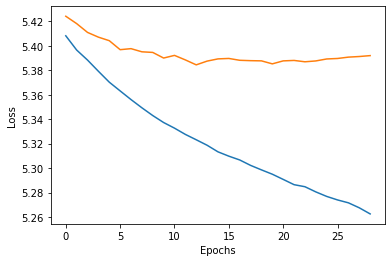

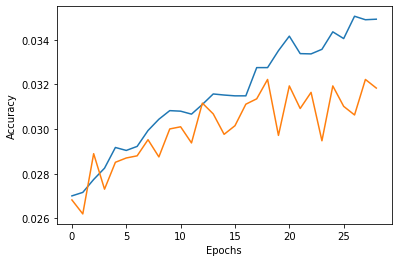

In [222]:
from keras.callbacks import EarlyStopping 
es_callback = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
h = model.fit(X_train, y_train, validation_data=(X_test,y_test), verbose=1, epochs=5000, callbacks=[es_callback])
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [174]:
len(sequences)

106069